In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/youtube_data_UAT_clean.csv')
df.head(10)

,video_id,title,release_date,views,likes,comments,tags,vid_length
0,tTVODRiVDCg,UAT Cyber Ninjas,2025-03-06 22:04:28+00:00,60,3,0,Not available,00:01:30
1,W5SA-6wphWA,2024 Valedictorian Tyler Widener,2025-02-26 18:01:39+00:00,32,1,0,Not available,00:00:16
2,4FXI2GgEus8,Your Idea of Fun is tech,2025-02-26 17:59:15+00:00,452,8,0,Not available,00:00:04
3,IfrdgzxlgFE,Looking for future UAT Students,2025-02-26 17:51:14+00:00,725,33,0,Not available,00:00:06
4,a6lS9iEcr70,Check out University of Advancing Technology,2025-02-26 17:49:12+00:00,455,10,0,Not available,00:00:06
5,LMz_7JWtWk8,The feeling when you graduate tomorrow,2025-02-26 17:46:48+00:00,417,26,0,Not available,00:00:08
6,oqduODBcF_I,UAT Class of 2027,2025-02-26 17:45:00+00:00,446,6,0,Not available,00:00:07
7,eMozUn_Mtlw,Girlbossed a little too hard and ended up at UAT,2025-02-20 17:14:56+00:00,441,12,0,Not available,00:00:14
8,FWLKknM2j_w,Girlbossed a little too hard,2025-02-20 17:14:52+00:00,444,1,0,Not available,00:00:16
9,yz7Qvt2Hgw0,Advancing Computer Science Major DITL,2025-02-20 17:14:48+00:00,20,1,0,Not available,00:00:33


In [ ]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   video_id      289 non-null    object
 1   title         289 non-null    object
 2   release_date  289 non-null    object
 3   views         289 non-null    int64 
 4   likes         289 non-null    int64 
 5   comments      289 non-null    int64 
 6   tags          289 non-null    object
 7   vid_length    289 non-null    object
dtypes: int64(3), object(5)
memory usage: 18.2+ KB


SPLITTING INTO TIMEFRAMES

Splitting time into categories for analysis

<60sec - Shorts (Under a minute)

<240sec - "Short" (Under 4 minutes)

<1200sec - Average (4-20mins)

=<1200sec - Long (Over 20 minutes)

In [ ]:
bins = [60, 240, 1200]

In [ ]:
# Changing format of video lengths
def convert_duration_to_seconds(duration):
    # Checking if the duration is 'Unknown' - one value as such in dataset
    if duration == 'Unknown':
        return None
    else:
        hours, minutes, seconds = map(int, duration.split(':'))
        total_seconds = (hours * 3600) + (minutes * 60) + seconds
        return total_seconds

vid_length_seconds = df['vid_length'].apply(convert_duration_to_seconds)

In [ ]:
time_df = df.copy()

# Convert 'vid_length' to seconds before applying pd.cut
time_df['vid_length_seconds'] = time_df['vid_length'].apply(convert_duration_to_seconds)

# Now apply pd.cut to the numeric 'vid_length_seconds' column
# Added a label to match the number of bins and included right=False to follow the original intent
time_df['vid_length'] = pd.cut(
    time_df['vid_length_seconds'],
    bins=[0, 60, 240, 1200, float('inf')],  # Added 0 and inf for boundaries
    labels=['Shorts', 'Short', 'Average', 'Long'],  # Added 'Short' label
    # Include the lowest value in the first bin
    include_lowest=True,
    # Specify right=False to make bins (0, 60], (60, 240], etc.
    right=False
)

In [ ]:
# Splitting the time into categories
shorts_df = time_df[time_df['vid_length'] == 'Shorts']
short_df = time_df[time_df['vid_length'] == 'Short']
average_df = time_df[time_df['vid_length'] == 'Average']
long_df = time_df[time_df['vid_length'] == 'Long']

Evaluating data about different video groups

In [ ]:
shorts_df.head(10)
shorts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 1 to 265
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   video_id            84 non-null     object  
 1   title               84 non-null     object  
 2   release_date        84 non-null     object  
 3   views               84 non-null     int64   
 4   likes               84 non-null     int64   
 5   comments            84 non-null     int64   
 6   tags                84 non-null     object  
 7   vid_length          84 non-null     category
 8   vid_length_seconds  84 non-null     float64 
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 6.2+ KB


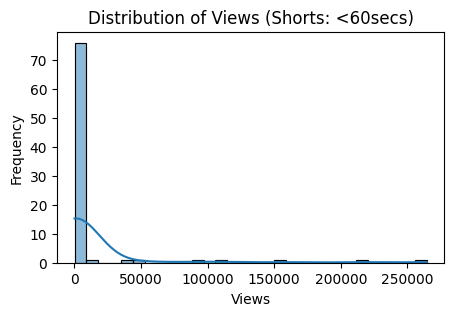

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(shorts_df['views'], bins=30, kde=True)
plt.title('Distribution of Views (Shorts: <60secs)')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

In [ ]:
shorts_views = shorts_df['views'].sum()
shorts_views

shorts_likes = shorts_df['likes'].sum()
shorts_likes

np.int64(1435)

In [ ]:
short_df.head(10)
short_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 0 to 262
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   video_id            69 non-null     object  
 1   title               69 non-null     object  
 2   release_date        69 non-null     object  
 3   views               69 non-null     int64   
 4   likes               69 non-null     int64   
 5   comments            69 non-null     int64   
 6   tags                69 non-null     object  
 7   vid_length          69 non-null     category
 8   vid_length_seconds  69 non-null     float64 
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 5.1+ KB


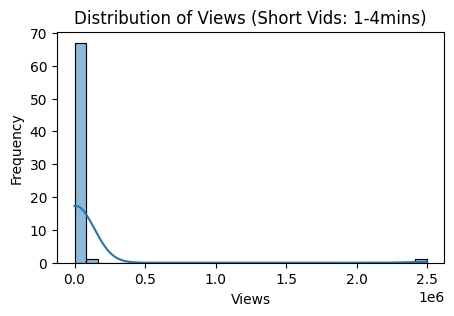

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(short_df['views'], bins=30, kde=True)
plt.title('Distribution of Views (Short Vids: 1-4mins)')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

In [ ]:
short_views = short_df['views'].sum()
short_views

short_likes = short_df['likes'].sum()
short_likes

np.int64(3345)

In [ ]:
average_df.head(10)
average_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 21 to 288
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   video_id            63 non-null     object  
 1   title               63 non-null     object  
 2   release_date        63 non-null     object  
 3   views               63 non-null     int64   
 4   likes               63 non-null     int64   
 5   comments            63 non-null     int64   
 6   tags                63 non-null     object  
 7   vid_length          63 non-null     category
 8   vid_length_seconds  63 non-null     float64 
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 4.7+ KB


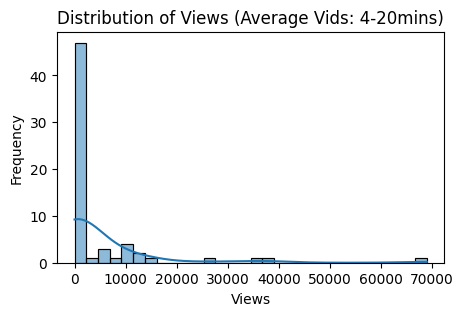

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(average_df['views'], bins=30, kde=True)
plt.title('Distribution of Views (Average Vids: 4-20mins)')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

In [ ]:
average_views = average_df['views'].sum()
average_views

average_likes = average_df['likes'].sum()
average_likes

np.int64(2577)

In [ ]:
long_df.head(10)
long_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 16 to 283
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   video_id            72 non-null     object  
 1   title               72 non-null     object  
 2   release_date        72 non-null     object  
 3   views               72 non-null     int64   
 4   likes               72 non-null     int64   
 5   comments            72 non-null     int64   
 6   tags                72 non-null     object  
 7   vid_length          72 non-null     category
 8   vid_length_seconds  72 non-null     float64 
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 5.3+ KB


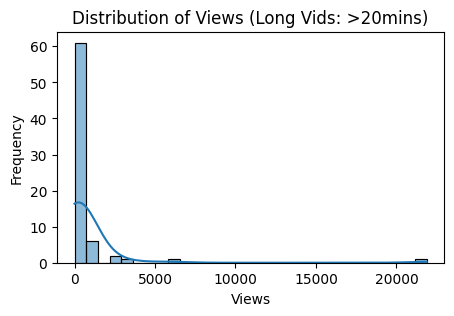

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(long_df['views'], bins=30, kde=True)
plt.title('Distribution of Views (Long Vids: >20mins)')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

In [ ]:
long_views = long_df['views'].sum()
long_views

np.int64(52574)

Linear Regression Analysis

Df: shorts_df

x/Input: Video Length

y/target output: View Count

In [ ]:
# Predicting views based on video length in seconds using linear regression
# X = pd.get_dummies(shorts_df['vid_length_seconds'])
X = shorts_df[['vid_length_seconds']]
y = shorts_df['views']

#y_pred = LinearRegression().fit(X, y).predict

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(67, 1)

In [ ]:
X_test.shape

(17, 1)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([12253.79529128, 13219.66530998, 11738.66461464, 13734.79598662,
       12125.01262212, 13219.66530998, 11545.4906109 , 13992.36132493,
       13734.79598662, 13219.66530998, 13155.2739754 , 13219.66530998,
       13606.01331746, 12253.79529128, 12640.14329876, 10901.5772651 ,
       13992.36132493])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 535024889.9042519
R-squared: -0.04914624614178509


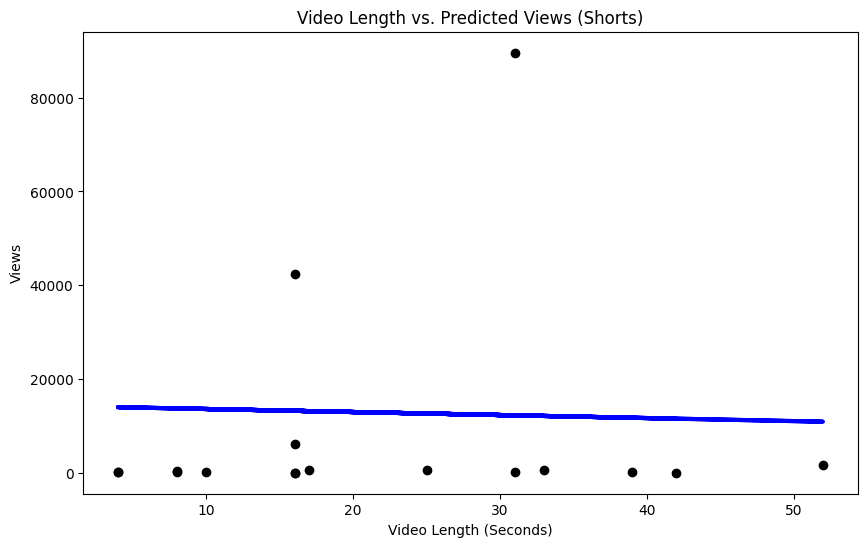

In [ ]:
# Plotting model performance
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Video Length (Seconds)')
plt.ylabel('Views')
plt.title('Video Length vs. Predicted Views (Shorts)')
plt.show()

In [ ]:
# Calculating r2 and mse
from sklearn.metrics import mean_squared_error, r2_score

y_pred = y_pred(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Printing results
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

R-squared: 4.941590709139909e-05
Mean Squared Error: 1801201972.682013


The model does not display almost any correlation between the length of the video and the views the video received for the YouTube Shorts created by the school (videos under 60 seconds).

The low r-squared value and high MSE both indicate the model's failure to capture accurate patterns.

Source for interpreting R-Squared and MSE: https://medium.com/@priyanka.talla09/understanding-r-squared-and-mean-squared-error-in-regression-tree-model-performance-494ffbf5b5ac#:~:text=A%20high%20R%C2%B2%20value%20coupled,patterns%20and%20makes%20inaccurate%20predictions.

Linear Regression Analysis

Df: short_df

x/Input: Video Length

y/target output: View Count

In [ ]:
X = short_df[['vid_length_seconds']]
y = short_df['views']

y_pred = LinearRegression().fit(X, y).predict

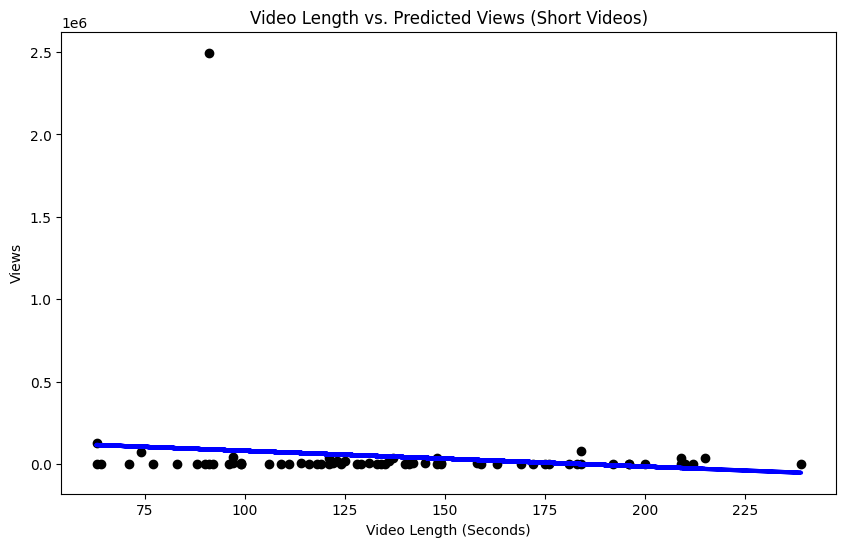

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black')
plt.plot(X, y_pred(X), color='blue', linewidth=3)
plt.xlabel('Video Length (Seconds)')
plt.ylabel('Views')
plt.title('Video Length vs. Predicted Views (Short Videos)')
plt.show()

In [ ]:
y_pred = y_pred(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Printing results
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

R-squared: 0.01863763395845286
Mean Squared Error: 87134663454.13171


The model shows no correlation between the video length and view counts for for Short videos (~1-4 minutes) has similarly low r-squared and similarly high mean squared error, indicating a poor performance in predicting views based on video length.

Linear Regression Analysis

Df: average_df

x/Input: Video Length

y/target output: View Count

In [ ]:
average_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 21 to 288
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   video_id            63 non-null     object  
 1   title               63 non-null     object  
 2   release_date        63 non-null     object  
 3   views               63 non-null     int64   
 4   likes               63 non-null     int64   
 5   comments            63 non-null     int64   
 6   tags                63 non-null     object  
 7   vid_length          63 non-null     category
 8   vid_length_seconds  63 non-null     float64 
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 4.7+ KB


In [ ]:
X = average_df[['vid_length_seconds']]
y = average_df['views']

y_pred = LinearRegression().fit(X, y).predict

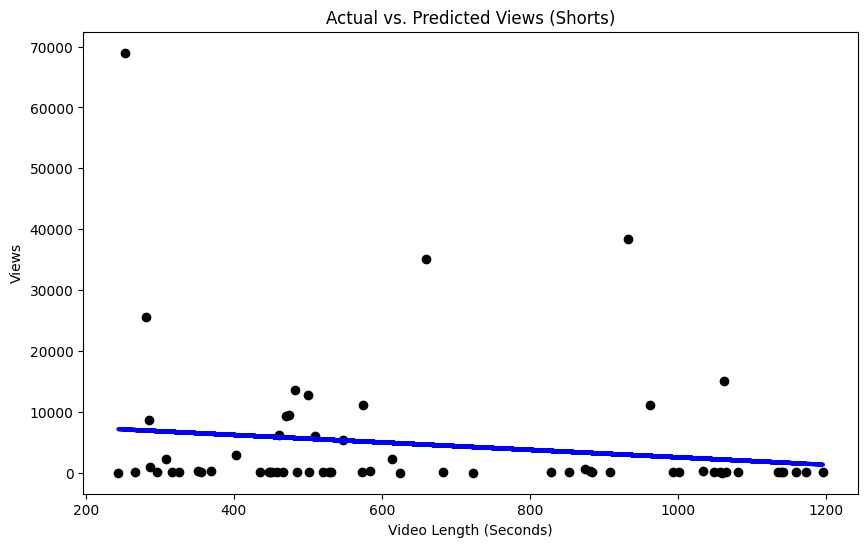

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black')
plt.plot(X, y_pred(X), color='blue', linewidth=3)
plt.xlabel('Video Length (Seconds)')
plt.ylabel('Views')
plt.title('Video Length vs. Predicted Views (Shorts)')
plt.show()

In [ ]:
y_pred = y_pred(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Printing results
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

R-squared: 0.02633728338040542
Mean Squared Error: 123204446.9879977


The model that predicts values for average length videos (~5-19 minutes) has similarly low r-squared and similarly high mean squared error, indicating a poor performance in predicting views based on video length.

Linear Regression Analysis

Df: long_df

x/Input: Video Length

y/target output: View Count

In [ ]:
X = long_df[['vid_length_seconds']]
y = long_df['views']

y_pred = LinearRegression().fit(X, y).predict


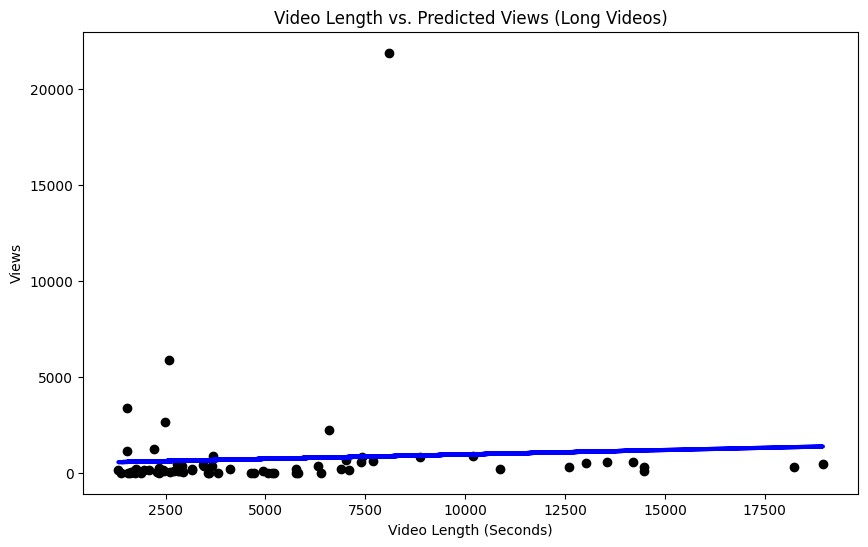

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black')
plt.plot(X, y_pred(X), color='blue', linewidth=3)
plt.xlabel('Video Length (Seconds)')
plt.ylabel('Views')
plt.title('Video Length vs. Predicted Views (Long Videos)')
plt.show()

In [ ]:
y_pred = y_pred(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Printing results
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

R-squared: 0.005179064848435555
Mean Squared Error: 7022370.421871328



The model indicates that there is a low (negligible) positive correlation between video length and view count for average length videos (20+ minutes). However, the model that predicts the values has similarly low r-squared and similarly high mean squared error, indicating a poor performance in predicting views based on video length.


Linear Regression Analysis

Df: df (all videos)

x/Input: Video Length

y/target output: View Count

In [ ]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   video_id            289 non-null    object  
 1   title               289 non-null    object  
 2   release_date        289 non-null    object  
 3   views               289 non-null    int64   
 4   likes               289 non-null    int64   
 5   comments            289 non-null    int64   
 6   tags                289 non-null    object  
 7   vid_length          288 non-null    category
 8   vid_length_seconds  288 non-null    float64 
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 18.7+ KB


In [ ]:
time_df_all = time_df.copy()

# Printing the rows with null values
null_rows = time_df_all[time_df_all.isnull().any(axis=1)]
print(null_rows)

        video_id                title               release_date  views  \
157  lD3WCIcRsos  UAT Graduation 2019  2019-05-03 22:31:17+00:00      0   

     likes  comments           tags vid_length  vid_length_seconds  
157      0         0  Not available        NaN                 NaN  


In [ ]:
from datetime import time
# Calculating z-scores
z_scores = np.abs((time_df_all['vid_length_seconds'] - time_df_all['vid_length_seconds'].mean()) / time_df_all['vid_length_seconds'].std())

time_df_all['zscores'] = z_scores

# Displaying data based on z score
z_score_df = time_df_all.sort_values(by='zscores', ascending=False)
print(z_score_df.head(10))

        video_id                                              title  \
74   -YjnY9Pa4g4    Spring 2022 Student Innovation Project Showcase   
94   qKUjjXR0RE4                        SIP Fall 2021 Presentations   
16   eM14BSr5kIM              Fall 2024 Student Innovation Showcase   
56   4X799F-f1IM  The Fall 2022 Student Innovation Project Showcase   
70   bFCfM1swwCk  The Summer 2022 Student Innovation Project Sho...   
51   kZC5bfUlyf4  The UAT Summer 2023 Student Innovation Project...   
129  H-MlwGVsKjs      Student Innovation Project Showcase Fall 2020   
55   Fuu0T6J3m9A  The Spring 2023 Student Innovation Project Sho...   
114  L5hXdABMYnI                     UAT SIP Showcase - Summer 2021   
156  9zpe08lQ3K8                                UAT Graduation 2019   

                  release_date  views  likes  comments  \
74   2022-05-09 22:25:17+00:00    479     10         2   
94   2021-12-17 23:32:28+00:00    305      9         0   
16   2025-01-02 22:14:28+00:00     66      3

In [ ]:
# Imputing the mean for video_length_seconds and applying proper video_length
mean_length = time_df_all['vid_length_seconds'].mean()
time_df_all['vid_length_seconds'].fillna(mean_length, inplace=True)

<ipython-input-38-61456d1277dc>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  time_df_all['vid_length_seconds'].fillna(mean_length, inplace=True)


In [ ]:
# Imputing the mode for video length
mode_length = time_df_all['vid_length'].mode()[0]
time_df_all['vid_length'].fillna(mode_length, inplace=True)

<ipython-input-33-571a9045cbd0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  time_df_all['vid_length'].fillna(mode_length, inplace=True)


In [ ]:
null_rows = time_df_all[time_df_all.isnull().any(axis=1)]
print(null_rows)

        video_id                title               release_date  views  \
157  lD3WCIcRsos  UAT Graduation 2019  2019-05-03 22:31:17+00:00      0   

     likes  comments           tags vid_length  vid_length_seconds  zscores  
157      0         0  Not available     Shorts          1479.53125      NaN  


In [ ]:
# Imputing the mean for video_length_seconds in time_df
mean_length = time_df['vid_length_seconds'].mean()
time_df['vid_length_seconds'].fillna(mean_length, inplace=True)

X = time_df[['vid_length_seconds']]
y = time_df['views']

y_pred = LinearRegression().fit(X, y).predict

<ipython-input-40-889dbdb1a5a0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  time_df['vid_length_seconds'].fillna(mean_length, inplace=True)


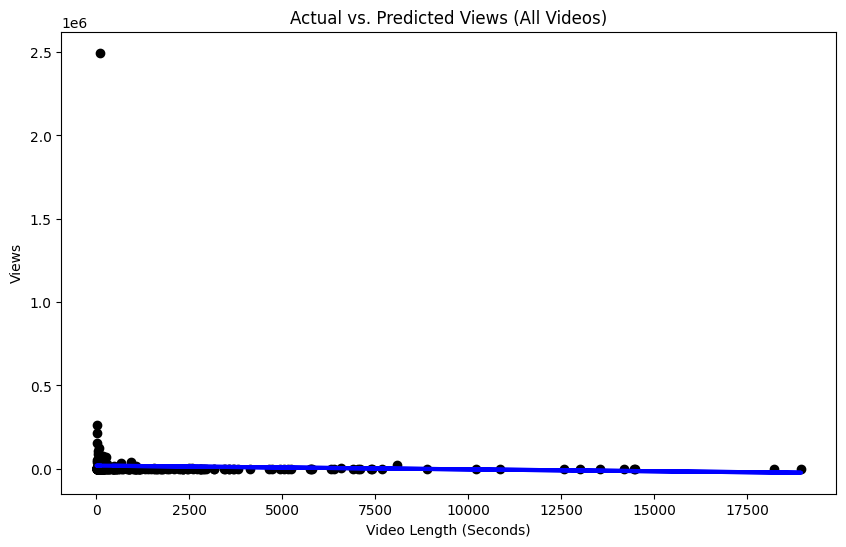

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black')
plt.plot(X, y_pred(X), color='blue', linewidth=3)
plt.xlabel('Video Length (Seconds)')
plt.ylabel('Views')
plt.title('Actual vs. Predicted Views (All Videos)')
plt.show()

In [ ]:
y_pred = y_pred(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Printing results
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

R-squared: 0.002044649254687503
Mean Squared Error: 22000620280.72027


The model indicates that there is no real correlation between video length and view count across all video lengths. However, the model that predicts those values has similarly low r-squared and similarly high mean squared error, indicating a poor performance in predicting views based on video length.

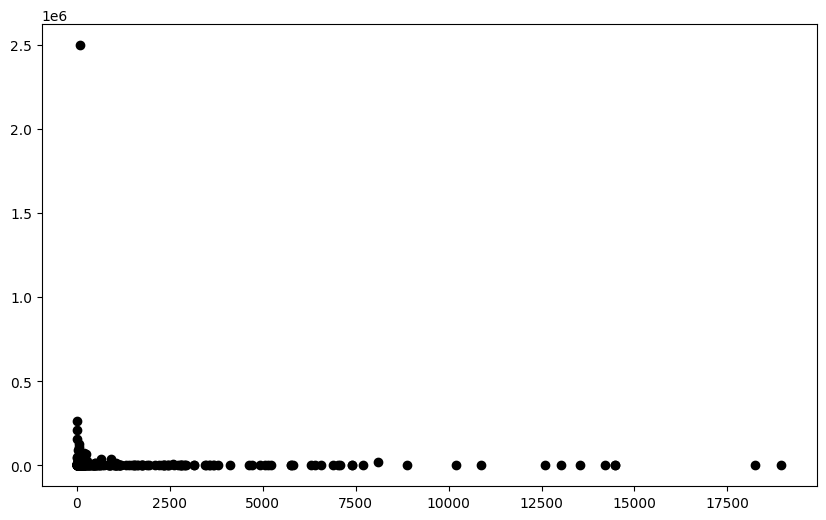

In [ ]:
# Plotting actual length vs views
plt.figure(figsize=(10, 6))
plt.scatter(time_df['vid_length_seconds'], time_df['views'], color='black')
plt.show()

In [ ]:
# Hypothesis testing for significant differences in engagement based on length

